In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from skimage.io import imshow
import matplotlib.image as mpimg
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

In [2]:
# Input data files consisting of the images
pics = np.load("./npy_dataset/olivetti_faces.npy")
labels = np.load("./npy_dataset/olivetti_faces_target.npy")
# print(pics, labels)

In [3]:
print("pics: ", pics.shape)
print("labels: ", labels.shape)

pics:  (400, 64, 64)
labels:  (400,)


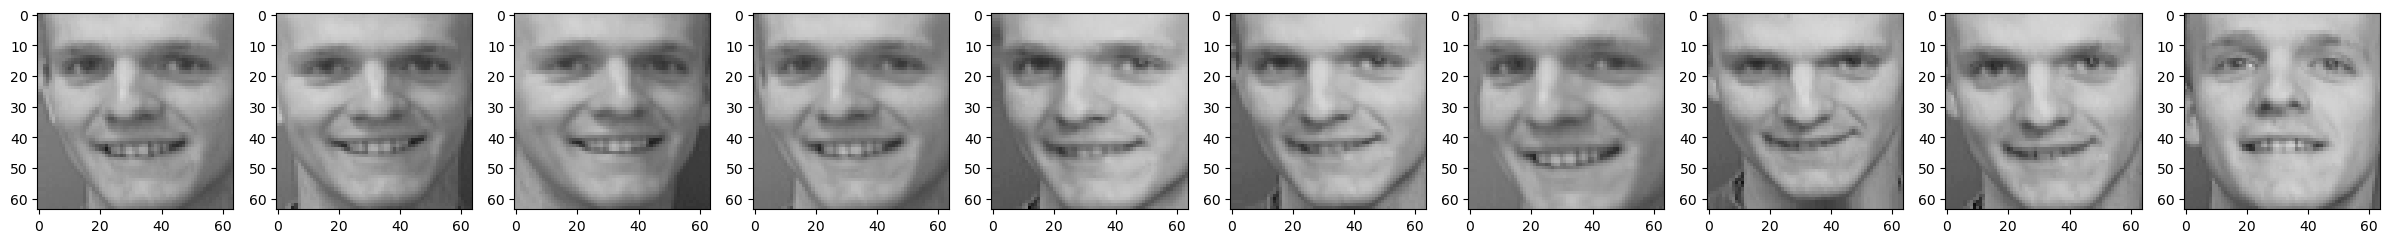

In [4]:
# Sample images of a subject
img_cnt = 10
plt.figure(figsize=(24,24))
for i in range(img_cnt):
    plt.subplot(1,10,i+1)
    x=pics[i+40] # 4th subject
    imshow(x)
plt.show()

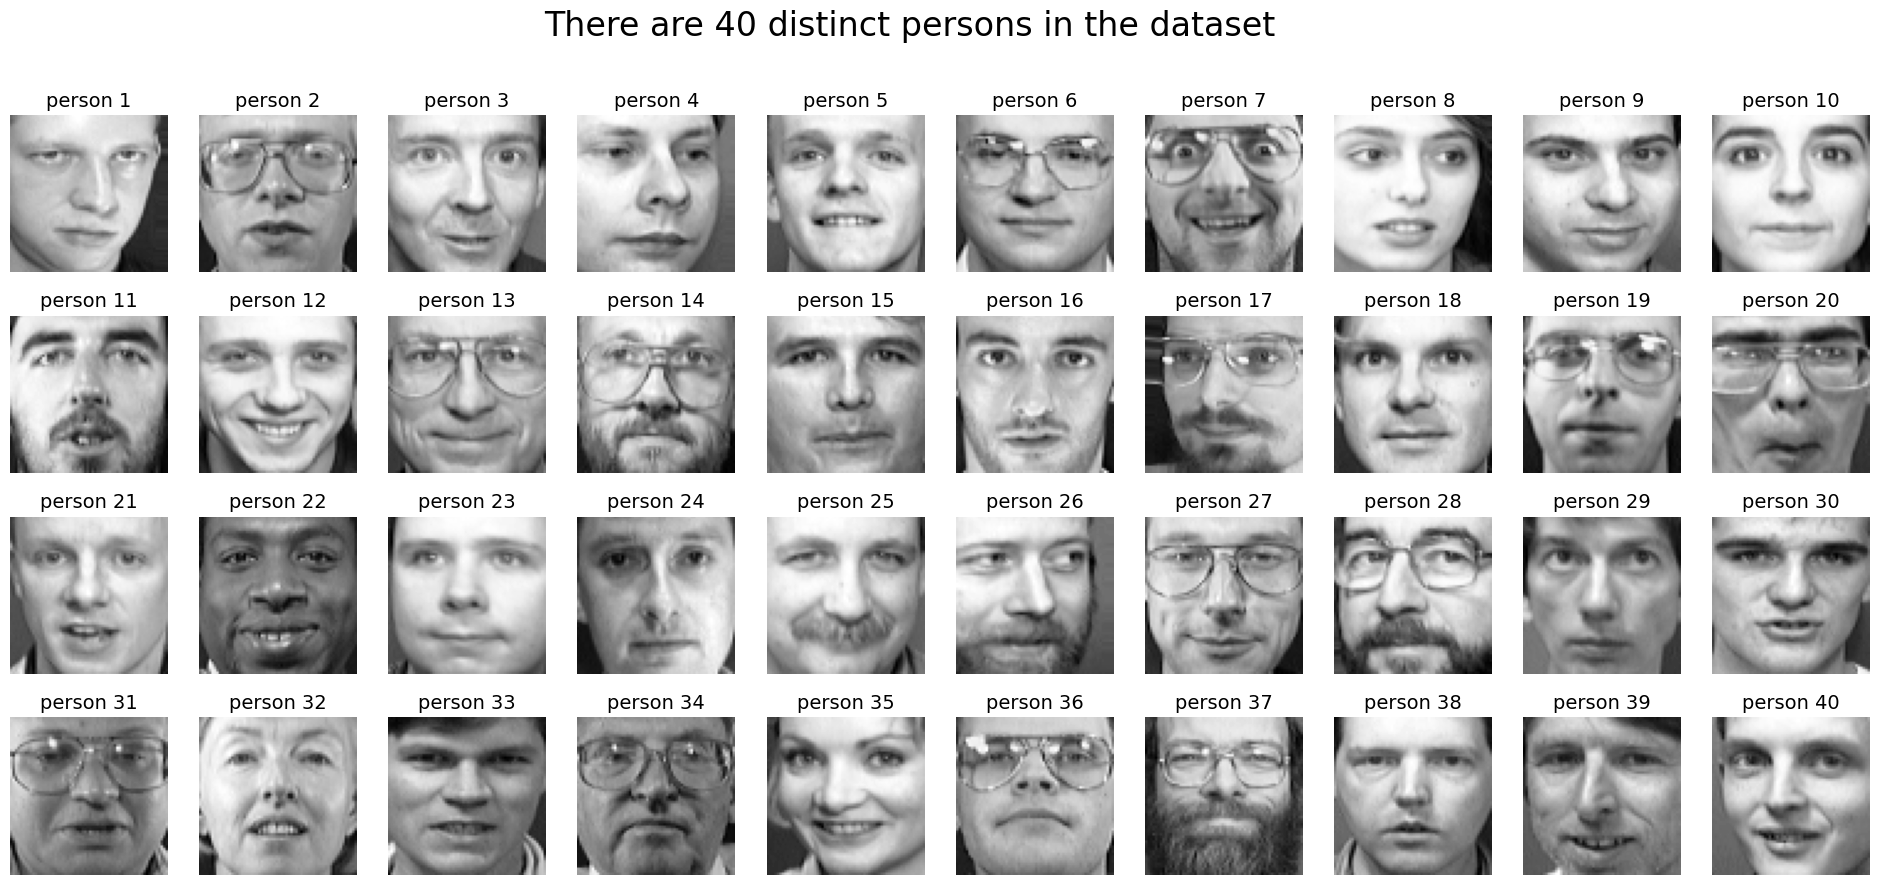

In [5]:
# All unique faces in the sample
fig = plt.figure(figsize=(24, 10))
columns = 10
rows = 4
for i in range(1, columns*rows +1):
    img = pics[(10*i-1),:,:]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap = plt.get_cmap('gray'))
    plt.title("person {}".format(i), fontsize=14)
    plt.axis('off')
    
plt.suptitle("There are 40 distinct persons in the dataset", fontsize=24)
plt.show()

In [6]:
#Machine learning models can work on vectors. Since the image data is in the matrix form, it must be converted to a vector.

Y = labels.reshape(-1,1) # store labels in Y
X=pics.reshape(pics.shape[0], pics.shape[1]*pics.shape[2]) # reshape and store images in X

print("X shape:",X.shape)
print("Y shape:",Y.shape)

X shape: (400, 4096)
Y shape: (400, 1)


In [7]:
#Split data for train and test purposes

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=46)

print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (280, 4096)
x_test:  (120, 4096)
y_train:  (280, 1)
y_test:  (120, 1)


In [8]:
#Principal_component_analysis
#from sklearn.decomposition import PCA

pca = PCA(.95)
X_train_pca = pca.fit_transform(x_train)
X_test_pca = pca.transform(x_test)


print('Original dataset:',x_train.shape)
print('Dataset after applying PCA:',X_train_pca.shape)
print('No of PCs/Eigen Faces:',len(pca.components_))
print('Eigen Face Dimension:',pca.components_.shape)
print('Variance Captured:',np.sum(pca.explained_variance_ratio_))

Original dataset: (280, 4096)
Dataset after applying PCA: (280, 103)
No of PCs/Eigen Faces: 103
Eigen Face Dimension: (103, 4096)
Variance Captured: 0.9504018


Text(0.5, 1.0, 'Average Face')

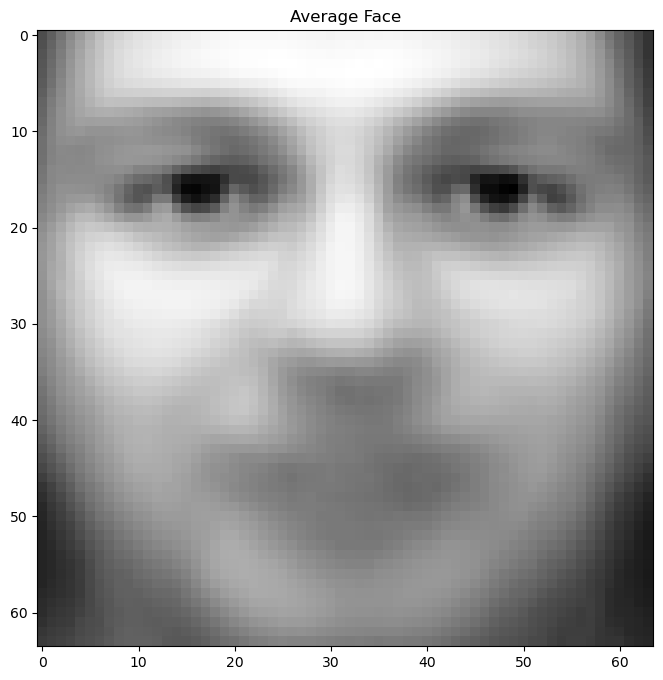

In [9]:
# Average face of the samples

plt.subplots(1,1,figsize=(8,8))
plt.imshow(pca.mean_.reshape((64,64)), cmap="gray")
plt.title('Average Face')

IndexError: index 100 is out of bounds for axis 0 with size 100

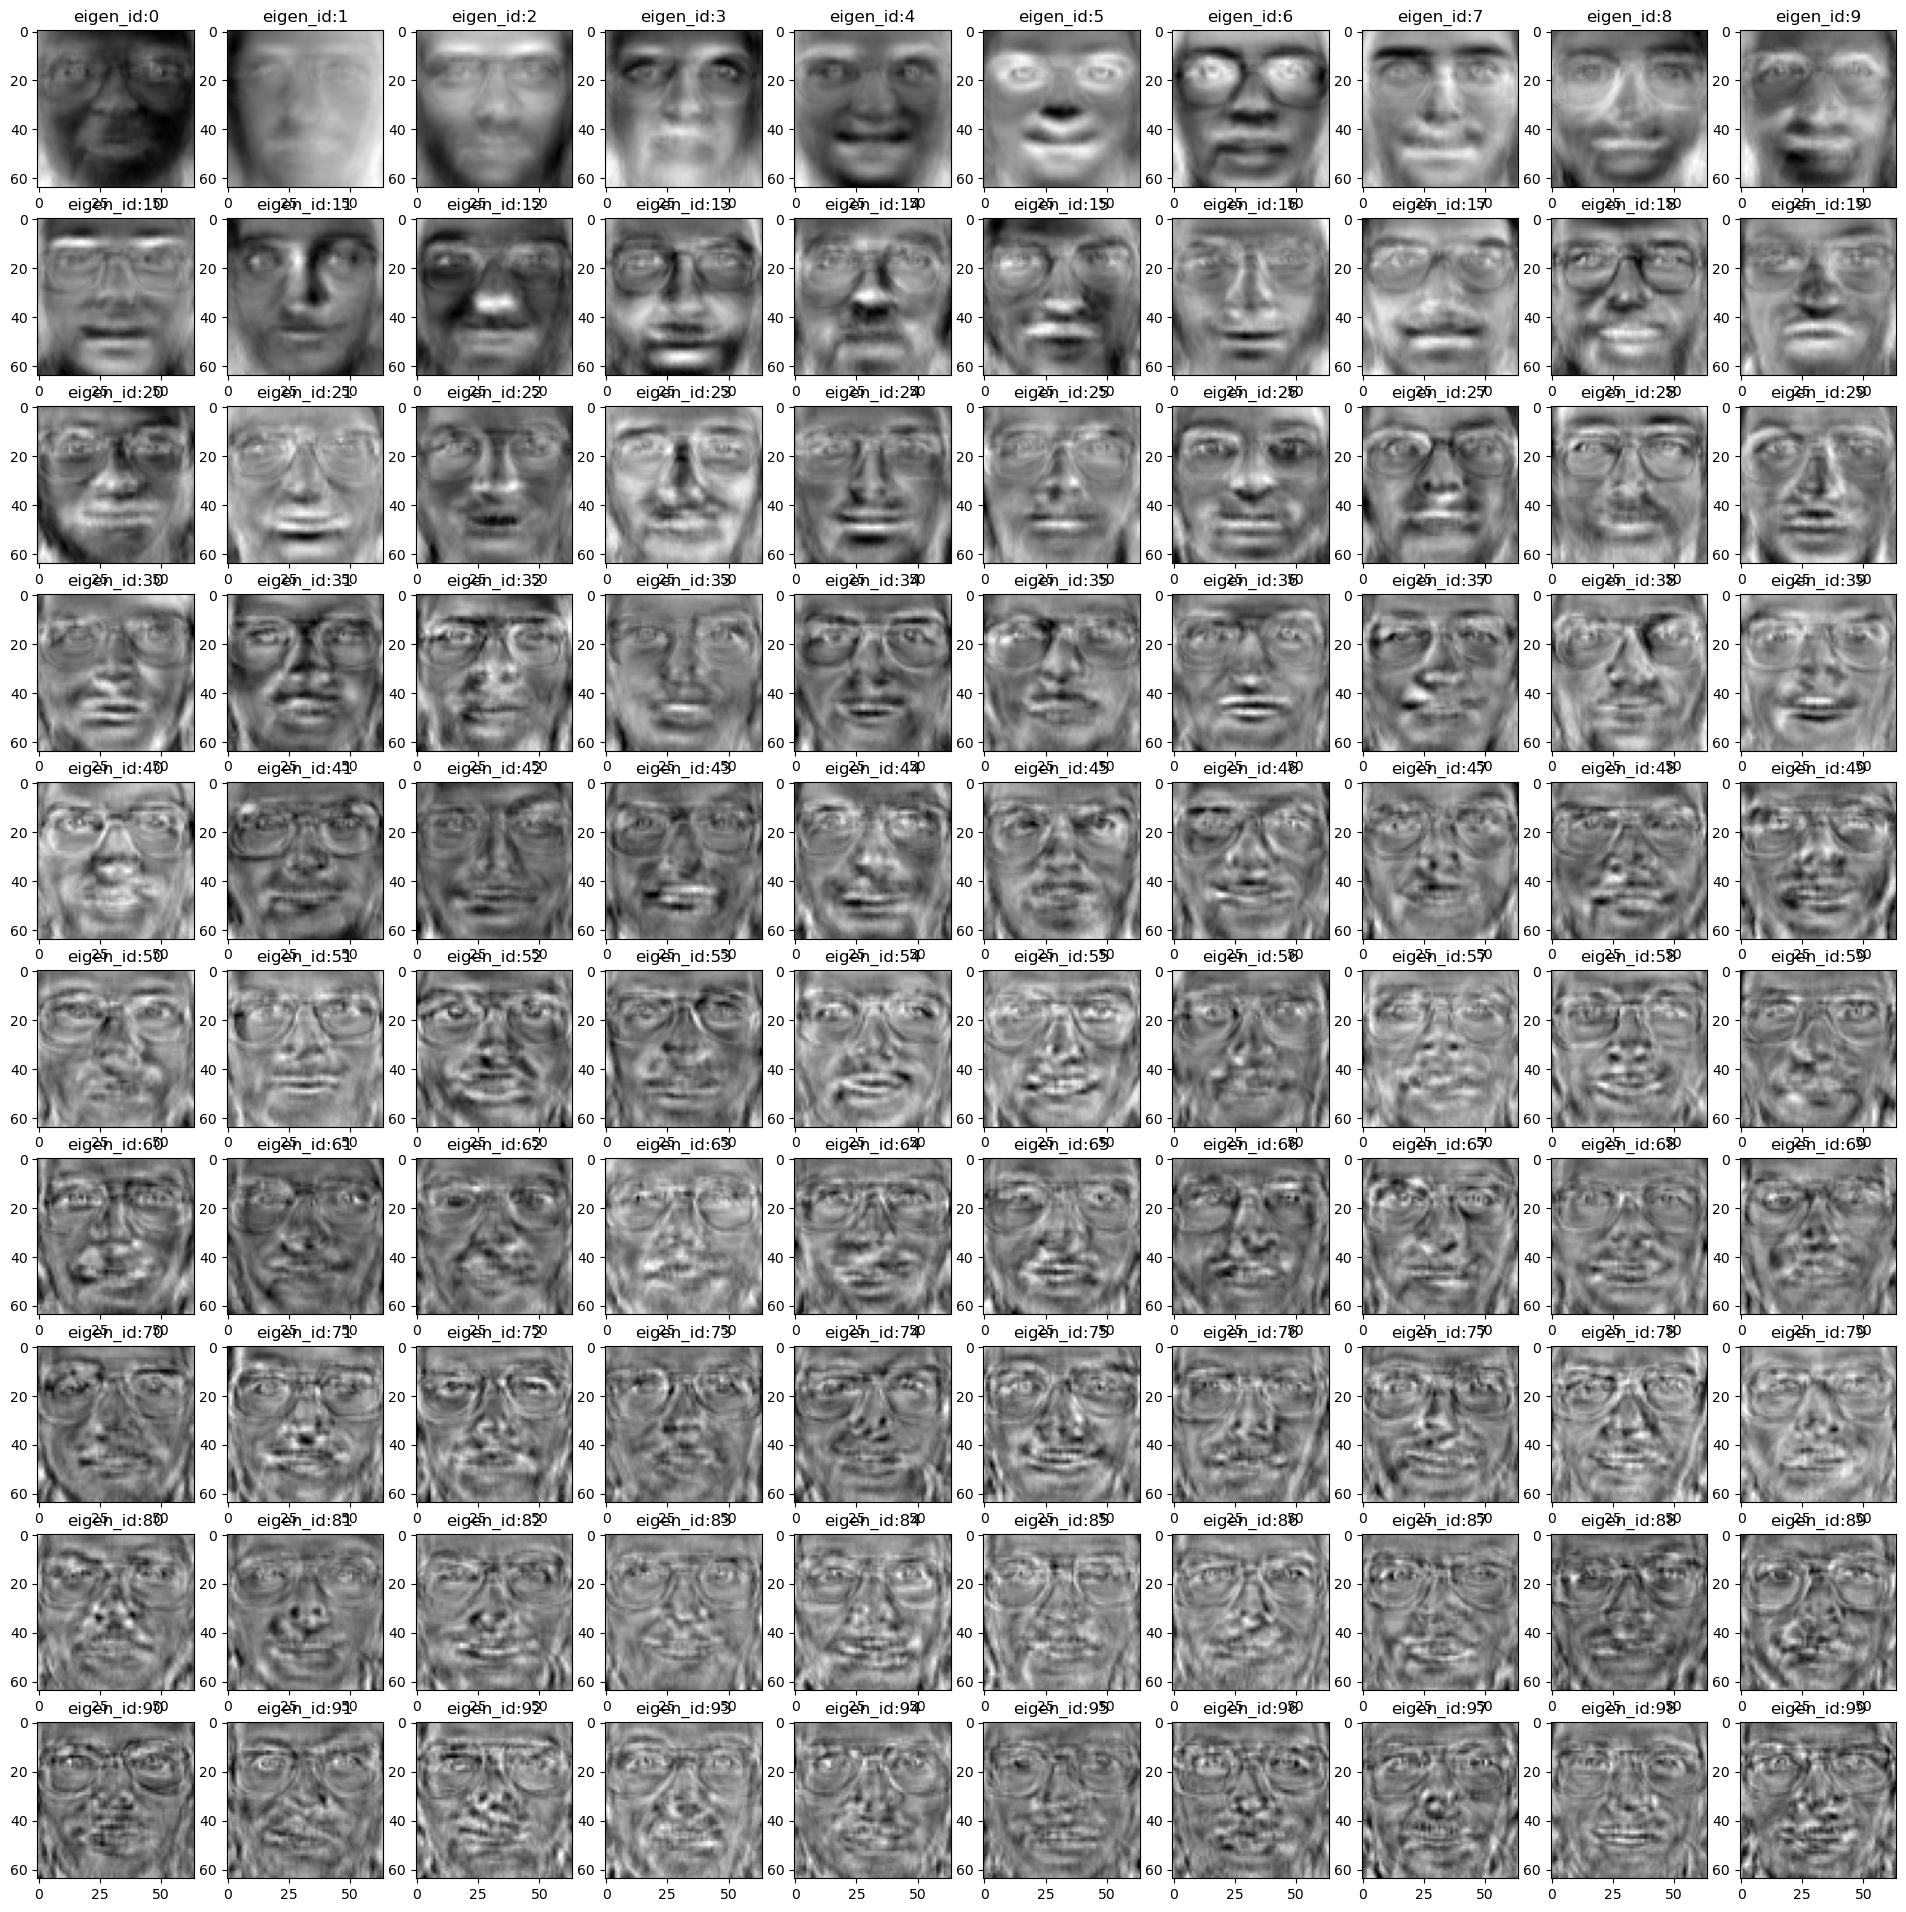

In [10]:
#Eigen_Faces

number_of_eigenfaces=len(pca.components_)
eigen_faces=pca.components_.reshape((number_of_eigenfaces, pics.shape[1], pics.shape[2]))

columns=10
rows=int(number_of_eigenfaces/columns)
fig, axarr=plt.subplots(nrows=rows, ncols=columns, figsize=(24,24))
axarr=axarr.flatten()
for i in range(number_of_eigenfaces):
    axarr[i].imshow(eigen_faces[i],cmap="gray")

    axarr[i].set_title("eigen_id:{}".format(i))
plt.suptitle("All Eigen Faces".format(10*"=", 10*"="))

In [ ]:
# Store accuracies of the machine learning methods for comparison at the end
list_names_pca = []
list_accuracy_pca = []

In [ ]:
#Logistic_Regression_classifier

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_pca, y_train)

LR_accuracy = round(lr.score(X_test_pca, y_test)*100,2)

print("LR_accuracy is %", LR_accuracy)

list_names_pca.append("Logistic Regression")
list_accuracy_pca.append(LR_accuracy)
y_pred = lr.predict(X_test_pca)


from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix:")
print(cm)

In [ ]:
#Random_forest_Classifier
rf = RandomForestClassifier(n_estimators = 400, random_state = 1)
rf.fit(X_train_pca, y_train)
RF_accuracy = round(rf.score(X_test_pca, y_test)*100,2)

y_pred = rf.predict(X_test_pca)
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix:")
print(cm)

print("RF_accuracy is %", RF_accuracy)

list_names_pca.append("Random Forest")
list_accuracy_pca.append(RF_accuracy)

In [ ]:
#KNN_Classifier
Knn = KNeighborsClassifier(n_neighbors = 1) # n_neighbors=1 gives the best result for this data
Knn.fit(X_train_pca, y_train)
Knn_accuracy = round(Knn.score(X_test_pca, y_test)*100,2)

print("Knn_accuracy is %", Knn_accuracy)

list_names_pca.append("KNN")
list_accuracy_pca.append(Knn_accuracy)

y_pred = Knn.predict(X_test_pca)
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix:")
print(cm)

In [ ]:
#Suppoer_Vector_Machine
svm = SVC(kernel = 'linear', random_state = 0)
svm.fit(X_train_pca, y_train)
svm_accuracy = round(svm.score(X_test_pca,y_test)*100,2)



y_pred = svm.predict(X_test_pca)

cm = confusion_matrix(y_test, y_pred)
print("confusion matrix:")
print(cm)

print("SVM_accuracy is %",svm_accuracy)
list_names_pca.append("SVM")
list_accuracy_pca.append(svm_accuracy)

In [ ]:
#Naive_Bayes

nb = GaussianNB()
nb.fit(X_train_pca, y_train)
nb_accuracy = round(nb.score(X_test_pca,y_test)*100,2)

# Predicting the Test set results
y_pred = nb.predict(X_test_pca)

# Making the Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
print("confusion matrix:")
print(cm)

print("Naive_Bayes_accuracy is %",nb_accuracy)
list_names_pca.append("Naive_Bayes")
list_accuracy_pca.append(nb_accuracy)

In [ ]:
#Accuracy_table
df = pd.DataFrame({'METHOD': list_names_pca, 'ACCURACY (%)': list_accuracy_pca})
df = df.sort_values(by=['ACCURACY (%)'])
df = df.reset_index(drop=True)
df.head()